# Парсинг HTML. BeautifulSoup.

### Скрейпинг и парсинг данных одной страницы.

In [1]:
!pip install bs4

In [2]:
# Импорт необходимых библиотек
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
# Путь к странице с данным
# website = "https://www.aptekaru.de/online-shop/allergie-heuschnupfen"

# website = 'https://gorzdrav.org/category/protivoallergicheskie/'

website = 'https://new.stolichki.ru/catalog/allergiya-247'

In [4]:
# GET-запрос к серверу
page = requests.get(website)


In [5]:
# Проверка статуса ответа сервера
page.status_code

200

In [6]:
# Парсинг данных 
soup = BeautifulSoup(page.content, 'html.parser')

'<!DOCTYPE html>\n<html>\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n  <noscript><meta http-equiv="refresh" content="0; url=/exhkqyad"></noscript>\n</head>\n<style>\n    .container {\n      display: flex;\n      align-content: center;\n      align-items: center;\n      justify-content: center;\n      flex-direction: column;\n      min-height: 100vh;\n    }\n    .load {\n      color: grey;\n      font-size: 3vh;\n    }\n    .spinner {\n      display: block;\n      background:  url(\'\');\n      width: 64px;\n      height: 64px;\n    }\n</style>\n<body>\n  <div id="id_spinner" class="container"><div class="load"></div><div class="spinner"></div></div>\n  <div id="id_captcha_frame_div" style="display: none;height: 100vh;"></div>\n  <script type="text/javascript" src="//cdnjs.cloudflare.com/ajax/libs/jsrsasign/8.0.20/jsrsasign-all-min.js"></script>\n  <script type="text/javascript" src="//cdn.jsdelivr.net/npm/@fingerprintjs/fingerprintjs@3/dist/fp.js"></
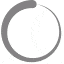

In [7]:
page.text

<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<noscript><meta content="0; url=/exhkqyad" http-equiv="refresh"/></noscript>
</head>
<style>
    .container {
      display: flex;
      align-content: center;
      align-items: center;
      justify-content: center;
      flex-direction: column;
      min-height: 100vh;
    }
    .load {
      color: grey;
      font-size: 3vh;
    }
    .spinner {
      display: block;
      background:  url('');
      width: 64px;
      height: 64px;
    }
</style>
<body>
<div class="container" id="id_spinner"><div class="load"></div><div class="spinner"></div></div>
<div id="id_captcha_frame_div" style="display: none;height: 100vh;"></div>
<script src="//cdnjs.cloudflare.com/ajax/libs/jsrsasign/8.0.20/jsrsasign-all-min.js" type="text/javascript"></script>
<script src="//cdn.jsdelivr.net/npm/@fingerprintjs/fingerprintjs@3/dist/fp.js" type="text/javascript"></script>
<script type="text/javascript">
(f
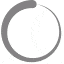

In [8]:
soup

In [9]:
print(soup.body.string)

None


In [1]:
# Поиск по тегу <div>
result = soup.find_all('div', ('class','catalog'))

NameError: name 'soup' is not defined

In [11]:
result

[]

In [12]:
len(result)

0

In [13]:
type(result)

bs4.element.ResultSet

### Скрейпинг ссылок на каждый товар

In [14]:
# Первая часть ссылки
url_1 = 'https://www.aptekaru.de'

In [15]:
# Извлечение списка относительных ссылок на товары
url_2 = []
for i in result:
  for link in i.find_all('div', ('class','product-card__about')):
    url_2.append(link.find('a').get('href'))

In [16]:
len(url_2)

0

In [17]:
url_2

[]

In [18]:
import urllib.parse

In [19]:
# Объединение двух частей ссылки в абсолютный путь и создание списка со ссылками на каждый товар, расположенный на странице
url_joined = []

for link in url_2:
  url_joined.append(urllib.parse.urljoin(url_1, link))

In [20]:
url_joined

[]

### Извлечение данных одного товара

In [ ]:
# Ссылка на первый товар
first_link = url_joined[0]

In [ ]:
# GET-запрос серверу
response = requests.get(first_link)

In [ ]:
# Парсинг данных
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
soup

In [ ]:
# Парсинг названия товара
name = soup.find('h1', ('class', 'h2 mt-0 sm:mb-6')).text
name

In [ ]:
import re

In [ ]:
form = soup.find('div', text=re.compile('Форма выпуска:'))

In [ ]:
form.get_text(strip=True)[15:]

In [ ]:
# Парсинг формы выпуска
form = soup.find('div', text=re.compile('Форма выпуска:')).get_text(strip=True)[15:]
form

In [ ]:
# Парсинг содержания
content = soup.find('div', text=re.compile('Содержание:')).get_text(strip=True)
content

In [ ]:
content = int(re.findall(r'\d+', content)[0])
content

In [ ]:
# Парсинг производителя
manufacturer = soup.find('div', text=re.compile('Производитель:')).get_text(strip=True)[15:]
manufacturer

In [ ]:
# Парсинг цены товара
price = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
price

In [ ]:
type(price)

In [ ]:
price = price.replace(',', '.')

In [ ]:
price = re.sub(r'[^\d.]+', '', price)
price

In [ ]:
price = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
price = price.replace(',', '.')
price = re.sub(r'[^\d.]+', '', price)
float(price)

In [ ]:
float(price)

### Объединяем все вместе - скрейпинг и парсинг информации о всех товарах одной страницы

In [ ]:
# Пустые списки, которые будут содержать соответствующие данные: название, цена, форма выпуска, содержание, производитель
name =[]
price =[]
form = []
content =[]
manufacturer =[]

In [ ]:
# Создание пустого словаря, который будет содержать все получаемые данные
output ={}

In [ ]:
# Цикл по списку ссылок на товары
for i in url_joined:
  response = requests.get(i)
  soup = BeautifulSoup(response.content, 'html.parser')

# Парсинг названия товара. Обработка исключения: добавляем пустую строку.
  try:
    name.append(soup.find('h1', ('class', 'h2 mt-0 sm:mb-6')).text)
  except:
    name.append('')

# Парсинг цены товара. 
  try:
    p = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
    p = p.replace(',', '.')
    p = float(re.sub(r'[^\d.]+', '', p))
    price.append(p)
  except:
    price.append('')

# Парсинг формы выпуска товара.
  try:
    form.append(soup.find('div', text=re.compile('Форма выпуска:')).get_text(strip=True)[15:])
  except:
    form.append('')

# Парсинг содержания (веса) товара.  
  try:  
    cont = soup.find('div', text=re.compile('Содержание:')).get_text(strip=True)
    cont = int(re.findall(r'\d+', cont)[0])
    content.append(cont)
  except:
    content.append('')

# Парсинг производителя товара.
  try:
    manufacturer.append(soup.find('div', text=re.compile('Производитель:')).get_text(strip=True)[15:])
  except:
    manufacturer.append('')

# Записываем данные в словарь
  output = {'Name' : name, 'Price' : price, 'Form' : form, 'Content' : content, 'Manufacturer' : manufacturer}

In [ ]:
output

In [ ]:
# Создание pandas dataframe
df = pd.DataFrame(output)

In [ ]:
df

## Скрейпинг нескольких страниц

In [ ]:
name =[]
price =[]
form = []
content =[]
manufacturer =[]
output = {}

url_1 = 'https://www.aptekaru.de'
url = 'https://www.aptekaru.de/online-shop/allergie-heuschnupfen'

while True:
  
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  next_page_link = soup.find('a', ('class', 'arrow next'))
  result = soup.find_all('div', ('class','product-box-container'))

  url_2 = []
  for i in result:
    for link in i.find_all('div', ('class','product-box__image')):
      url_2.append(link.find('a').get('href'))
  
  url_joined = []

  for link in url_2:
    url_joined.append(urllib.parse.urljoin(url_1, link))
  
  for i in url_joined:
    response = requests.get(i)

    soup = BeautifulSoup(response.content, 'html.parser')

    # Парсинг названия товара. Обработка исключения: добавляем пустую строку.
    try:
      name.append(soup.find('h1', ('class', 'h2 mt-0 sm:mb-6')).text)
    except:
      name.append('')

    # Парсинг цены товара. 
    try:
      p = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
      p = p.replace(',', '.')
      p = float(re.sub(r'[^\d.]+', '', p))
      price.append(p)
    except:
      price.append('')

    # Парсинг формы выпуска товара.
    try:
      form.append(soup.find('div', text=re.compile('Форма выпуска:')).get_text(strip=True)[15:])
    except:
      form.append('')

    # Парсинг содержания (веса) товара.  
    try:  
      cont = soup.find('div', text=re.compile('Содержание:')).get_text(strip=True)
      cont = int(re.findall(r'\d+', cont)[0])
      content.append(cont)
    except:
      content.append('')

    # Парсинг производителя товара.
    try:
      manufacturer.append(soup.find('div', text=re.compile('Производитель:')).get_text(strip=True)[15:])
    except:
      manufacturer.append('')

    output = {'Name' : name, 'Price' : price, 'Form' : form, 'Content' : content, 'Manufacturer' : manufacturer}

  if not next_page_link:
    break
  
  url = url_1 + next_page_link['href']



In [ ]:
df = pd.DataFrame(output)
df

In [ ]:
df.to_csv('remedies.csv')